## Import packages

In [1]:
#Importing required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Defining variables to store the data

In [2]:
#dataset taken from https://data.fivethirtyeight.com/  under the tag NBA-forecasts for the 2021-22 NBA predictions
filename = "nba_elo.csv"

## Reading data

In [4]:
# 2021-22 NBA Predictions
def read_csv(file_name):
    """
        Function to read csv file into pandas dataframe
        args:
            file_name(str) - The csv file name to read
        return:
            (pd.DataFrame) - The pandas dataframe created from the csv file
    """
    dataframe = pd.read_csv(filename)
    return dataframe

nba_data = read_csv(filename)
nba_data.head()

date  season  neutral playoff team1 team2  elo1_pre   elo2_pre  \
0  1946-11-01    1947        0     NaN   TRH   NYK    1300.0  1300.0000   
1  1946-11-02    1947        0     NaN   STB   PIT    1300.0  1300.0000   
2  1946-11-02    1947        0     NaN   DTF   WSC    1300.0  1300.0000   
3  1946-11-02    1947        0     NaN   CHS   NYK    1300.0  1306.7233   
4  1946-11-02    1947        0     NaN   PRO   BOS    1300.0  1300.0000   

   elo_prob1  elo_prob2  ...  carm-elo2_post  raptor1_pre  raptor2_pre  \
0   0.640065   0.359935  ...             NaN          NaN          NaN   
1   0.640065   0.359935  ...             NaN          NaN          NaN   
2   0.640065   0.359935  ...             NaN          NaN          NaN   
3   0.631101   0.368899  ...             NaN          NaN          NaN   
4   0.640065   0.359935  ...             NaN          NaN          NaN   

   raptor_prob1  raptor_prob2  score1  score2  quality  importance  \
0           NaN           NaN      66      68        0         NaN   
1           NaN           NaN      56      51        0         NaN   
2           NaN           NaN      33      50        0         NaN   
3           NaN           NaN      63      47        0         NaN   
4           NaN           NaN      59      53        0         NaN   

   total_rating  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 27 columns]

## Data exploration

In [5]:
print(f"The number of rows is {nba_data.shape[0]} and the number of columns is {nba_data.shape[1]}")

The number of rows is 72043 and the number of columns is 27


In [6]:
# Checking the  statistics of data
nba_data.describe()

season       neutral      elo1_pre      elo2_pre     elo_prob1  \
count  72043.000000  72043.000000  72043.000000  72043.000000  72043.000000   
mean    1991.993407      0.002846   1497.367591   1497.595465      0.620921   
std       19.333075      0.053268    112.177802    111.633983      0.178096   
min     1947.000000      0.000000   1105.617800   1091.644500      0.062616   
25%     1977.000000      0.000000   1419.779800   1420.020900      0.498434   
50%     1994.000000      0.000000   1502.869400   1503.811200      0.639866   
75%     2008.000000      0.000000   1578.044277   1577.659550      0.759303   
max     2022.000000      1.000000   1855.779115   1865.449075      0.981685   

          elo_prob2     elo1_post     elo2_post  carm-elo1_pre  carm-elo2_pre  \
count  72043.000000  72043.000000  72043.000000    5249.000000    5249.000000   
mean       0.379079   1497.215138   1497.747917    1514.442619    1512.956395   
std        0.178096    112.634308    111.823383     118.284594     117.975403   
min        0.018315   1100.291900   1085.774400    1187.730784    1192.842155   
25%        0.240697   1419.174800   1420.180837    1438.915861    1438.574702   
50%        0.360134   1502.984400   1503.747100    1513.701235    1513.414767   
75%        0.501566   1578.134500   1578.112450    1590.360355    1587.122603   
max        0.937384   1860.313175   1865.449075    1872.690559    1881.619599   

       ...  carm-elo2_post  raptor1_pre  raptor2_pre  raptor_prob1  \
count  ...     5249.000000  4949.000000  4949.000000   4949.000000   
mean   ...     1514.005778  1504.815062  1502.339397      0.612426   
std    ...      117.934170   127.237874   127.283301      0.198988   
min    ...     1192.004524   865.245083   936.128372      0.037829   
25%    ...     1439.007779  1424.876900  1423.759026      0.471961   
50%    ...     1514.116819  1510.182647  1505.242553      0.634335   
75%    ...     1588.215959  1598.032968  1597.216728      0.771573   
max    ...     1881.619599  1850.636656  1842.700562      0.994335   

       raptor_prob2        score1        score2       quality   importance  \
count   4949.000000  72043.000000  72043.000000  72043.000000  1323.000000   
mean       0.387574    105.209417    101.636509     45.165137    25.157974   
std        0.198988     14.814241     14.357287     28.922670    27.404545   
min        0.005665      2.000000      0.000000      0.000000     0.000000   
25%        0.228427     96.000000     92.000000     20.000000     5.000000   
50%        0.365665    105.000000    102.000000     44.000000    15.000000   
75%        0.528039    115.000000    111.000000     69.000000    38.000000   
max        0.962171    184.000000    186.000000    100.000000   100.000000   

       total_rating  
count   1323.000000  
mean      37.771731  
std       23.429669  
min        0.000000  
25%       18.500000  
50%       39.000000  
75%       51.000000  
max      100.000000  

[8 rows x 23 columns]

## Data Cleaning

Not dropping the missing fields from the data as carmelo and raptor metrics were employed in the later years being the reason for missing data in the first place.
However, we can create a winner column to tell which team won based on the scores.

In [7]:
nba_data['winner'] = np.where(nba_data['score1'] > nba_data['score2'], 0, 1)
nba_data.head()

date  season  neutral playoff team1 team2  elo1_pre   elo2_pre  \
0  1946-11-01    1947        0     NaN   TRH   NYK    1300.0  1300.0000   
1  1946-11-02    1947        0     NaN   STB   PIT    1300.0  1300.0000   
2  1946-11-02    1947        0     NaN   DTF   WSC    1300.0  1300.0000   
3  1946-11-02    1947        0     NaN   CHS   NYK    1300.0  1306.7233   
4  1946-11-02    1947        0     NaN   PRO   BOS    1300.0  1300.0000   

   elo_prob1  elo_prob2  ...  raptor1_pre  raptor2_pre  raptor_prob1  \
0   0.640065   0.359935  ...          NaN          NaN           NaN   
1   0.640065   0.359935  ...          NaN          NaN           NaN   
2   0.640065   0.359935  ...          NaN          NaN           NaN   
3   0.631101   0.368899  ...          NaN          NaN           NaN   
4   0.640065   0.359935  ...          NaN          NaN           NaN   

   raptor_prob2  score1  score2  quality  importance  total_rating  winner  
0           NaN      66      68        0         NaN           NaN       1  
1           NaN      56      51        0         NaN           NaN       0  
2           NaN      33      50        0         NaN           NaN       1  
3           NaN      63      47        0         NaN           NaN       0  
4           NaN      59      53        0         NaN           NaN       0  

[5 rows x 28 columns]

In [8]:
# Removing teams that are not relavent anymore

valid_teams_data = nba_data.groupby(['team1']).max()["season"].reset_index()
nba_data = nba_data[nba_data["team1"].isin(valid_teams_data[valid_teams_data["season"]==2022]["team1"])]

## Exploratory Data Analysis

Understanding the significance of elo, carm-elo and raptor statistics in predicting the game winner

In [9]:
# Correlation between Elo and winner predictions
nba_data.corr()[["elo1_pre", "elo2_pre", "elo_prob1", "elo_prob2"]].loc["winner"]

elo1_pre    -0.266740
elo2_pre     0.234822
elo_prob1   -0.368086
elo_prob2    0.368086
Name: winner, dtype: float64

In [10]:
# Correlation between Carm-elo and winner predictions
nba_data[~nba_data["carm-elo1_pre"].isnull()].corr()[["carm-elo1_pre", "carm-elo2_pre", "carm-elo_prob1", "carm-elo_prob2"]].loc["winner"]

carm-elo1_pre    -0.270369
carm-elo2_pre     0.229194
carm-elo_prob1   -0.365453
carm-elo_prob2    0.365453
Name: winner, dtype: float64

In [11]:
# Correlation between raptor and winner predictions
nba_data[~nba_data["raptor1_pre"].isnull()].corr()[["raptor1_pre", "raptor2_pre", "raptor_prob1", "raptor_prob2"]].loc["winner"]

raptor1_pre    -0.254275
raptor2_pre     0.215583
raptor_prob1   -0.359712
raptor_prob2    0.359712
Name: winner, dtype: float64

In [12]:
# Combined correlations of data containing all 3 metrics
nba_data[~nba_data["raptor1_pre"].isnull()].corr().loc["winner"].sort_values()

score1           -0.475609
raptor_prob1     -0.359712
carm-elo1_post   -0.348880
carm-elo_prob1   -0.347793
elo1_post        -0.338141
elo_prob1        -0.322802
carm-elo1_pre    -0.270057
raptor1_pre      -0.254275
elo1_pre         -0.248132
quality          -0.026189
total_rating     -0.021820
importance       -0.001966
neutral           0.014092
season            0.030002
elo2_pre          0.197058
carm-elo2_pre     0.204321
raptor2_pre       0.215583
carm-elo2_post    0.284790
elo2_post         0.289533
elo_prob2         0.322802
carm-elo_prob2    0.347793
raptor_prob2      0.359712
score2            0.465515
winner            1.000000
Name: winner, dtype: float64

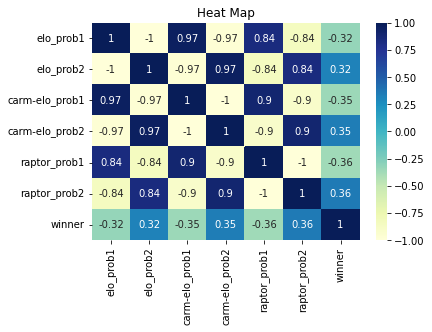

In [31]:
# heatmap selected to compare elo , carm-elo and raptor and show which is the best metric for team skills
def plot_heatmap():
    """
        Function to plot the heat map
        return:
            (None)
    """
    dataplot = sns.heatmap(nba_data[~nba_data["raptor1_pre"].isnull()][["elo_prob1", "elo_prob2", "carm-elo_prob1", "carm-elo_prob2", "raptor_prob1", "raptor_prob2", "winner"]].corr(), cmap="YlGnBu", annot=True)

    plt.title(f'Heat Map')
    plt.show()
plot_heatmap()

In [17]:
# Function to get average team scores of selected teams
def average_team_scores(num_teams, ascending):
    """
        Function to plot the average score of top n teams based on the scores
        args:
            num_teams(int) - The number of teams in the plot
            ascending(bool) - Flag to get top n teams if False and bottom n teams if True
        return:
            (None)
    """
    selected_teams = nba_data.groupby(['team1']).mean()["score1"].sort_values(ascending=ascending).reset_index()["team1"][:num_teams]
    nba_selected_data = nba_data[nba_data["team1"].isin(selected_teams)]
    sns.catplot(x = "team1",
                y = "score1",
                data = nba_selected_data,
                kind = "bar",
                height=8.27,
                aspect=15/8.27)

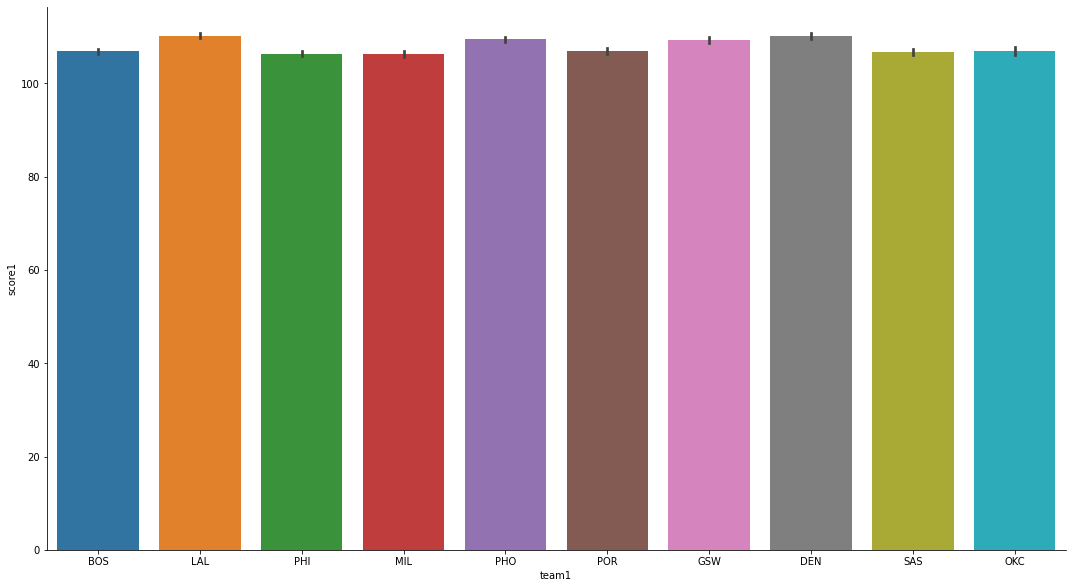

In [21]:
#Plot for Top 10 teams in Descending Order
average_team_scores(10, False)

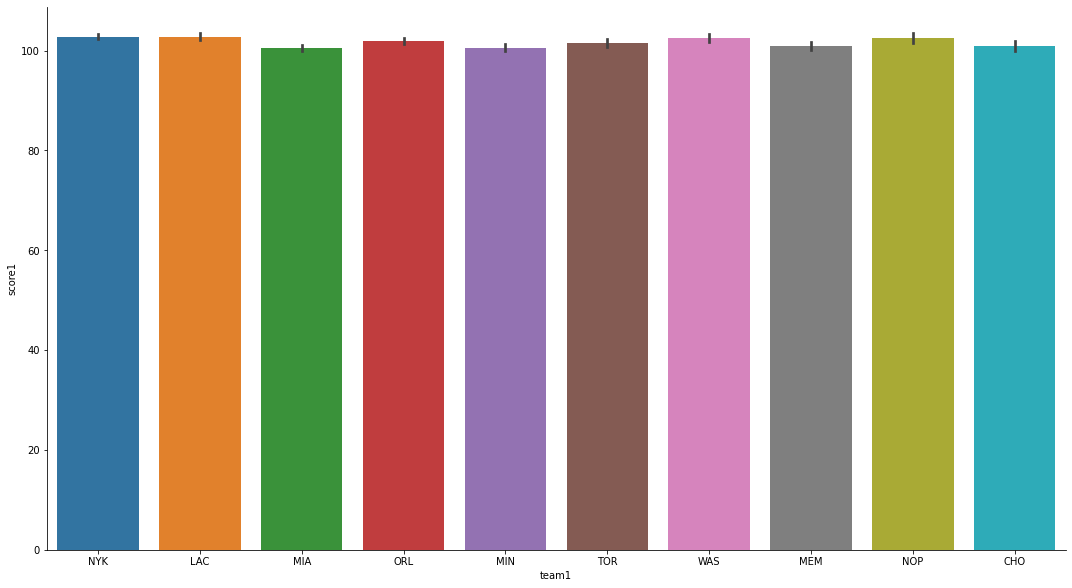

In [22]:
# Least average scores of 10 teams in ascending order
average_team_scores(10, True)

Picking the teams LAL which has the highest average score against MIA which has the lowest average score

In [32]:
# Filtering the games where LAL (LA Lakers) played against MIA (Miami Heat)
team_subset_data1 = nba_data[(nba_data["team1"]=="LAL") & (nba_data["team2"]=="MIA")]
team_subset_data2 = nba_data[(nba_data["team1"]=="MIA") & (nba_data["team2"]=="LAL")]
team_subset_data1.head()

date  season  neutral playoff team1 team2   elo1_pre   elo2_pre  \
30236  1989-01-06    1989        0     NaN   LAL   MIA  1610.2240  1229.7791   
30844  1989-04-16    1989        0     NaN   LAL   MIA  1618.0151  1224.6387   
31375  1990-01-07    1990        0     NaN   LAL   MIA  1654.7976  1255.6290   
33133  1991-04-05    1991        0     NaN   LAL   MIA  1659.4080  1318.7301   
33731  1992-01-05    1992        0     NaN   LAL   MIA  1505.6101  1415.5586   

       elo_prob1  elo_prob2  ...  raptor1_pre  raptor2_pre  raptor_prob1  \
30236   0.940792   0.059208  ...          NaN          NaN           NaN   
30844   0.944805   0.055195  ...          NaN          NaN           NaN   
31375   0.946518   0.053482  ...          NaN          NaN           NaN   
33133   0.926678   0.073322  ...          NaN          NaN           NaN   
33731   0.749139   0.250861  ...          NaN          NaN           NaN   

       raptor_prob2  score1  score2  quality  importance  total_rating  winner  
30236           NaN     118      86        8         NaN           NaN       0  
30844           NaN     121     108        8         NaN           NaN       0  
31375           NaN     132      93       16         NaN           NaN       0  
33133           NaN     108      87       32         NaN           NaN       0  
33731           NaN     123     111       28         NaN           NaN       0  

[5 rows x 28 columns]

In [33]:
#Displaying header data
team_subset_data2.head()

date  season  neutral playoff team1 team2   elo1_pre   elo2_pre  \
29994  1988-11-23    1989        0     NaN   MIA   LAL  1245.0835  1642.5204   
30601  1989-03-08    1989        0     NaN   MIA   LAL  1207.0345  1644.4054   
31218  1989-12-13    1990        0     NaN   MIA   LAL  1267.3297  1640.2882   
32967  1991-03-12    1991        0     NaN   MIA   LAL  1343.4060  1656.1902   
33494  1991-11-27    1992        0     NaN   MIA   LAL  1420.1196  1629.6326   

       elo_prob1  elo_prob2  ...  raptor1_pre  raptor2_pre  raptor_prob1  \
29994   0.152881   0.847119  ...          NaN          NaN           NaN   
30601   0.125421   0.874579  ...          NaN          NaN           NaN   
31218   0.172035   0.827965  ...          NaN          NaN           NaN   
32967   0.227078   0.772922  ...          NaN          NaN           NaN   
33494   0.347418   0.652582  ...          NaN          NaN           NaN   

       raptor_prob2  score1  score2  quality  importance  total_rating  winner  
29994           NaN      91     138       13         NaN           NaN       1  
30601           NaN      87     127        8         NaN           NaN       1  
31218           NaN      75     102       17         NaN           NaN       1  
32967           NaN      95     102       39         NaN           NaN       1  
33494           NaN      87      89       54         NaN           NaN       1  

[5 rows x 28 columns]

In [34]:
#Printing Total Number of games between LAL and MIA
print("Number of games in total between LAL and MIA : ", team_subset_data1.shape[0]+team_subset_data1.shape[1])

Number of games in total between LAL and MIA :  65


In [35]:
#Printing games won by LAL
print("Number of games won by LAL : ", team_subset_data1[team_subset_data1["winner"]==0].shape[0] + team_subset_data2[team_subset_data2["winner"]==1].shape[0])

Number of games won by LAL :  42


In [36]:
#Printing Win Percentage of games between LAL and MIA
print("The win percentage of LAL compared to MIA is : ", 100-((team_subset_data1[team_subset_data1["winner"]==0].shape[0] + team_subset_data2[team_subset_data2["winner"]==1].shape[0])/team_subset_data1.shape[0]+team_subset_data1.shape[1]))

The win percentage of LAL compared to MIA is :  70.86486486486487


In [37]:
# Function to plot the trend
def plot_trend(trend_column, trend_label):
    """
        Function to plot the trend of given column against the seasons
        args:
            trend_column(str) - Name of column to plot the trend
            trend_label(str) - Display name of the column to plot on the chart
        return:
            (None)
    """
    plt.plot(team_subset_data1["season"], team_subset_data1[trend_column])
    plt.plot(team_subset_data2["season"], team_subset_data2[trend_column])
    plt.title(f'{trend_label} VS season')
    plt.xlabel('Season')
    plt.ylabel(trend_label)
    plt.legend(["LAL", "MIA"])
    plt.show()

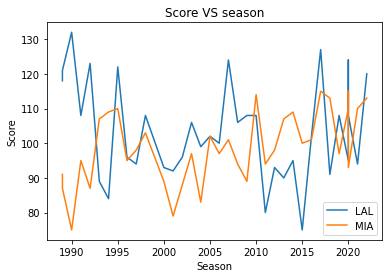

In [39]:
# Plotting Season Vs Score
plot_trend("score1", "Score")

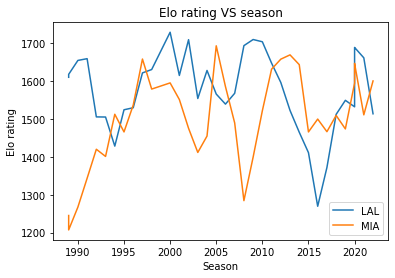

In [40]:
# Plotting Elo rating Vs Season
plot_trend("elo1_pre", "Elo rating")